In [2]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import gmaps
import json
import os
%matplotlib inline

In [3]:
with open('secrets.json') as secrets_file:    
    secrets = json.load(secrets_file)
    
len(secrets)

2

In [4]:
gmaps.configure(api_key=secrets['GMAPS_API_KEY'])

In [53]:
plt.rcParams['figure.figsize'] = (5,5)

In [9]:
stations = pd.read_csv('data/stations_combined.csv', index_col=0)
stations.head(5)

,location,name,address,latitude,longitude,phone
station_id,,,,,,
4030,Cupertino,Valero,"10002 N De Anza Blvd, Cupertino, CA 95014, USA",37.323388,-122.031775,408-996-1222
10588,Cupertino,Chevron,"10023 S De Anza Blvd, Cupertino, CA 95014, USA",37.322547,-122.032735,408-996-9906
24622,Los Altos,Shell,"929 Fremont Ave, Los Altos Hills, CA 94024, USA",37.354072,-122.088676,650-949-3746
21026,Menlo Park,Quik Stop,"3401 Middlefield Rd, Menlo Park, CA 94025, USA",37.470637,-122.201853,650-365-5783
2550,Mountain View,ARCO,"790 W Middlefield Rd, Mountain View, CA 94043,...",37.402403,-122.074635,(650) 934-2630


In [10]:
stations.describe()

,latitude,longitude
count,336.000000,336.000000
mean,37.430980,-122.143135
std,0.171924,0.242650
min,36.984397,-122.515774
25%,37.337983,-122.334396
50%,37.429867,-122.158949
75%,37.566795,-121.995910
max,37.811295,-121.551986


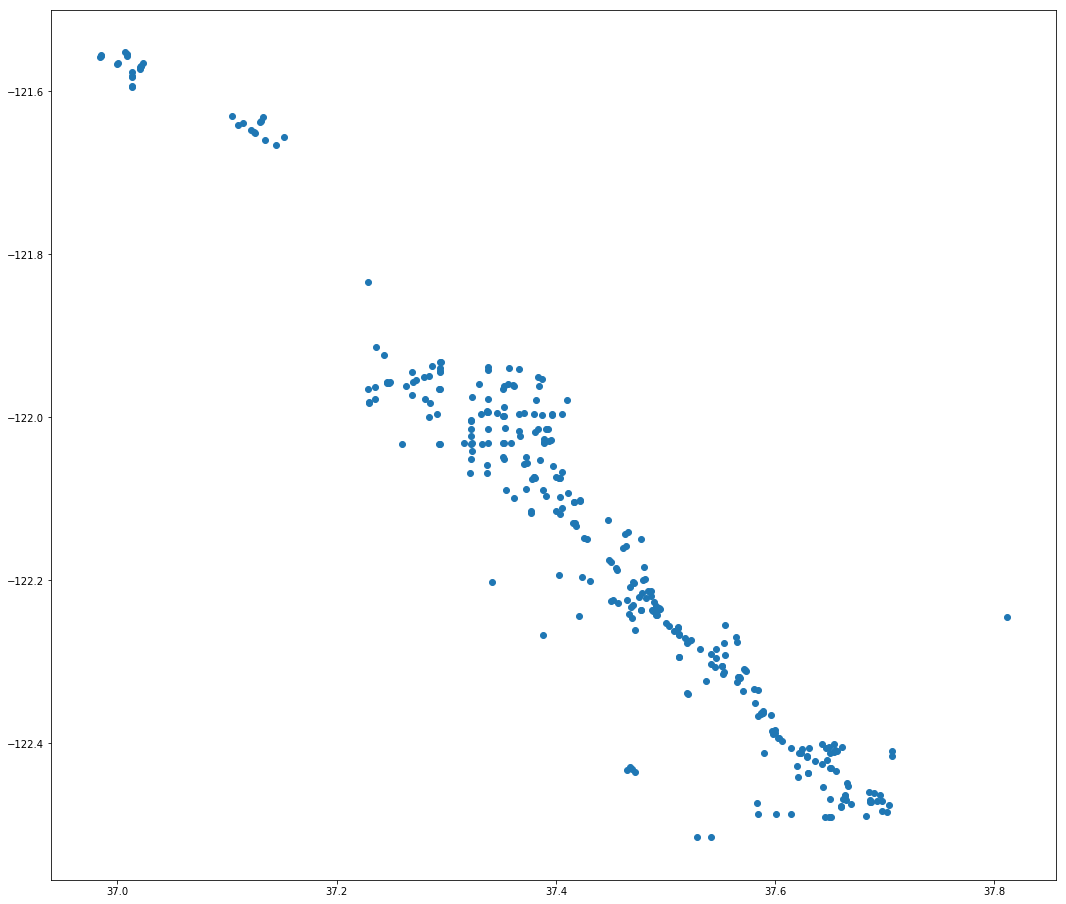

In [11]:
fig = plt.figure(figsize=(18,16))
plt.scatter(stations['latitude'], stations['longitude'])
plt.show()

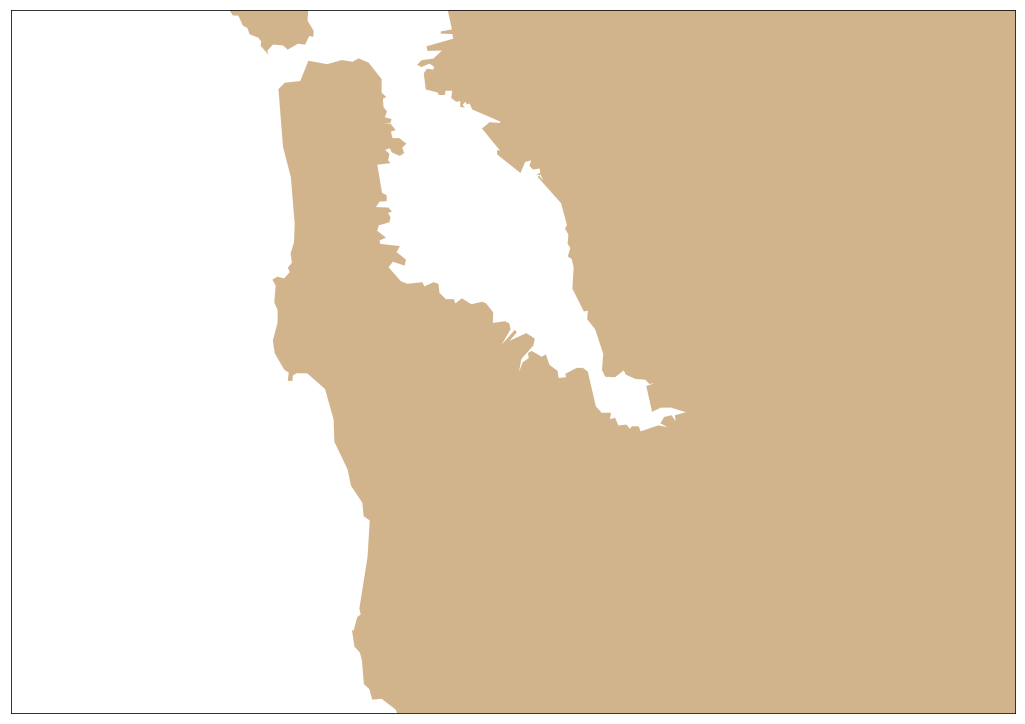

In [58]:
# m = Basemap(projection='ortho', lat_0=37.430980, lon_0=-122.143135)
# lower left = (37.166, -122.843)
# upper right = (37.859, -121.598)

fig=plt.figure(figsize=(18, 16))

m = Basemap(llcrnrlon=-122.843, llcrnrlat=37.166, urcrnrlon=-121.598, urcrnrlat=37.859,
            projection='lcc',lat_0=37.430980,lon_0=-122.143135,
            resolution ='h')
m.fillcontinents(color='tan')

plt.show()

In [16]:
stations_coords = list(zip(stations['latitude'], stations['longitude']))

In [20]:
bay_area_coordinates = (37.430980, -122.143135)
# fig = gmaps.figure(center=bay_area_coordinates, zoom_level=10)
fig = gmaps.figure()
markers = gmaps.marker_layer(stations_coords)
fig.add_layer(markers)
fig

A Jupyter Widget

In [28]:
m = gmaps.Map(width="1000px", height="1000px")
markers = gmaps.marker_layer(stations_coords)
m.add_layer(markers)
m

A Jupyter Widget